# <font style="color:rgb(50,120,229)">Introduction to Pytorch</font>
This notebook will provide a brief overview of PyTorch and how it is similar to Numpy. The goal of this notebook is to understand the basic data structures required to build Deep Learning models and train them.

### <font style="color:rgb(8,133,37)">Why do we need PyTorch when we already have Numpy?</font>
Deep Learning involves performing similar operations like convolutions and multiplications repetitively. Thus there is a need to run the code on GPUs which can parallelize these operations over multiple cores - these devices are perfectly suitable for doing massive matrix operations and are much faster than CPUs.

On the diagram below you can find iteration times for several well-known architectures of neural networks running on different hardware. Please note, that the vertical axis has a logarithmic scale. Data for this chart was from taken [here](https://github.com/jcjohnson/cnn-benchmarks).

<img src='https://www.learnopencv.com/wp-content/uploads/2020/01/c3_w1_forward-backward-time-scaled.jpg'/>

While NumPy with its various backends suits perfectly for doing calculus on CPU, it lacks the GPU computations support. And this is the first reason why we need Pytorch.

The other reason is that Numpy is a genral purpose library. PyTorch ( or any other modern deep learning library ) has optimized code for many deep learning specific operations (e.g. Gradient calculations ) which are not present in Numpy.

So, let's take a look at what are the data structures of Pytorch and how it provides us its cool features.

# <font style="color:rgb(50,120,229)">Tensor - Pytorch's core data structure</font>

As we've already seen, in python we can create lists, lists of lists, lists of lists of lists and so on. In NumPy there is a `numpy.ndarray` which represents `n`-dimensional array, e.g. 3-dimensional if we want to find an analog for a list of lists of lists. In math, there is a special name for the generalization of vectors and matrices to a higher dimensional space - a tensor.

Tensor is an entity with a defined number of dimensions called an order (rank).

**Scalars** can be considered as a rank-0-tensor. Let's denote scalar value as $x \in \mathbb{R}$, where $\mathbb{R}$ is a set of real numbers.

**Vectors** can be introduced as a rank-1-tensor. Vectors belong to linear space (vector space), which is, in simple terms, a set of possible vectors of a specific length. A vector consisting of real-valued scalars ($x \in \mathbb{R}$) can be defined as ($y \in \mathbb{R}^n$), where $y$ - vector value and $\mathbb{R}^n$ - $n$-dimensional real-number vector space. $y_i$ - $i_{th}$ vector element (scalar):

$$
 y = \begin{bmatrix}
           x_{1} \\
           x_{2} \\
           \vdots \\
           x_{n}
         \end{bmatrix}
$$

**Matrices** can be considered as a rank-2-tensor. A matrix of size $m \times n$, where $m, n \in \mathbb{N}$ (rows and columns number accordingly) consisting of real-valued scalars can be denoted as $A \in \mathbb{R}^{m \times n}$, where $\mathbb{R}^{m \times n}$ is a real-valued $m \times n$-dimensional vector space:

$$
A = \begin{bmatrix}
    x_{11}       & x_{12} & x_{13} & \dots & x_{1n} \\
    x_{21}       & x_{22} & x_{23} & \dots & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{m1}       & x_{m2} & x_{m3} & \dots & x_{mn}
\end{bmatrix}
$$


In the picture below you can find different tensor dimensions, where the fourth and the fifth cases are a vector of cubes and a matrix of cubes accordingly:

<table style="border: 5px solid red">
    <tr><th><center>Rank-1-tensor</center></th><th><center>Rank-2-tensor</center></th><th><center>Rank-3-tensor</center></th><th><center>Rank-4-tensor</center></th><th><center>Rank-5-tensor</center></th></tr>
        <th><center><img align="middle" src="https://www.learnopencv.com/wp-content/uploads/2020/01/c3_w1_1D_tensor_.jpg" width="30" height="30"></center></th>
        <th><center><img align="middle" src="https://www.learnopencv.com/wp-content/uploads/2020/01/c3_w1_2D_tensor.jpg" width="130" height="130"></center></th>
        <th><center><img align="middle" src="https://www.learnopencv.com/wp-content/uploads/2020/01/c3_w1_3D_tensor.jpg" width="145" height="145"></center></th>
        <th><center><img align="middle" src="https://www.learnopencv.com/wp-content/uploads/2020/01/c3_w1_4D_tensor_.jpg" width="120" height="120"></center></th>
        <th><center><img align="middle" src="https://www.learnopencv.com/wp-content/uploads/2020/01/c3_w1_matrix_of_cubes.jpg" width="240" height="240"></center></th>
</table>

## <font style="color:rgb(50,120,229)">Tensor basics</font>
Let's import the torch module first

In [4]:
import numpy as np
import torch

### <font style="color:rgb(8,133,37)">Tensor Creation </font>
Let's view examples of matrices and tensors generation.

2-dimensional (rank-2) tensor of zeros:

In [2]:
torch.zeros(3, 4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

Random rank-4 tensor:

In [3]:
torch.rand(2, 2, 2, 2)

tensor([[[[0.5592, 0.9979],
          [0.4885, 0.1753]],

         [[0.3148, 0.8579],
          [0.8233, 0.5794]]],


        [[[0.4505, 0.2951],
          [0.4681, 0.2516]],

         [[0.2171, 0.3471],
          [0.5390, 0.6476]]]])

For sure, there are many more ways to create tensor using some restrictions on values it should contain - for the full reference, please follow the [official docs](https://pytorch.org/docs/stable/torch.html#creation-ops).

### <font style="color:rgb(8,133,37)">Python / NumPy / Pytorch interoperability</font>
You can create tensors from python lists as well as numpy arrays. You can also convert torch tensors to numpy arrays. So, the interoperability between torch and numpy is pretty good.

In [4]:
# Simple Python list
python_list = [1, 2]

# Create a numpy array from python list
numpy_array = np.array(python_list)

# Create a torch Tensor from python list
tensor_from_list = torch.tensor(python_list)

# Create a torch Tensor from Numpy array
tensor_from_array = torch.tensor(numpy_array)

# Another way to create a torch Tensor from Numpy array (Share same storage)
tensor_from_array_v2 = torch.from_numpy(numpy_array)

# Convert torch tensor to numpy array
array_from_tensor = tensor_from_array.numpy()

print('List:   ', python_list)
print('Array:  ', numpy_array)
print('Tensor: ', tensor_from_list)
print('Tensor: ', tensor_from_array)
print('Tensor: ', tensor_from_array_v2)
print('Array:  ', array_from_tensor)

List:    [1, 2]
Array:   [1 2]
Tensor:  tensor([1, 2])
Tensor:  tensor([1, 2])
Tensor:  tensor([1, 2])
Array:   [1 2]


#### Differnce between `torch.Tensor` and `torch.from_numpy`

Pytorch aims to be an effective library for computations. What does it mean? It means that pytorch avoids memory copying if it can:

In [5]:
numpy_array[0] = 10

print('Array:  ', numpy_array)
print('Tensor: ', tensor_from_array)
print('Tensor: ', tensor_from_array_v2)

Array:   [10  2]
Tensor:  tensor([1, 2])
Tensor:  tensor([10,  2])


So, we have two different ways to create tensor from its NumPy counterpart - one copies memory and another one shares the same underlying storage. It also works in the opposite way:

In [6]:
array_from_tensor = tensor_from_array.numpy()
print('Tensor: ', tensor_from_array)
print('Array: ', array_from_tensor)

tensor_from_array[0] = 11
print('Tensor: ', tensor_from_array)
print('Array: ', array_from_tensor)

Tensor:  tensor([1, 2])
Array:  [1 2]
Tensor:  tensor([11,  2])
Array:  [11  2]


### <font style="color:rgb(8,133,37)">Data types</font>

The basic data type for all Deep Learning-related operations is float, but sometimes you may need something else. Pytorch supports different numbers types for its tensors the same way as NumPy does it - by specifying the data type on tensor creation or via casting. The full list of supported data types can be found [here](https://pytorch.org/docs/stable/tensors.html).

In [7]:
tensor = torch.zeros(2, 2)
print('Tensor with default type: ', tensor)
tensor = torch.zeros(2, 2, dtype=torch.float16)
print('Tensor with 16-bit float: ', tensor)
tensor = torch.zeros(2, 2, dtype=torch.int16)
print('Tensor with integers: ', tensor)
tensor = torch.zeros(2, 2, dtype=torch.bool)
print('Tensor with boolean data: ', tensor)

Tensor with default type:  tensor([[0., 0.],
        [0., 0.]])
Tensor with 16-bit float:  tensor([[0., 0.],
        [0., 0.]], dtype=torch.float16)
Tensor with integers:  tensor([[0, 0],
        [0, 0]], dtype=torch.int16)
Tensor with boolean data:  tensor([[False, False],
        [False, False]])


### <font style="color:rgb(8,133,37)">Indexing</font>

Tensor provides access to its elements via the same `[]` operation as a regular python list or NumPy array. However, as you may recall from NumPy usage, the full power of math libraries is accessible only via vectorized operations, i.e. operations without explicit looping over all vector elements in python and using implicit optimized loops in C/C++/CUDA/Fortran/etc. available via special functions calls. Pytorch employs the same paradigm and provides a wide range of vectorized operations. Let's take a look at some examples.

Joining a list of tensors together with `torch.cat`

In [8]:
a = torch.zeros(3, 2)
b = torch.ones(3, 2)
print(torch.cat((a, b), dim=0))
print(torch.cat((a, b), dim=1))

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[0., 0., 1., 1.],
        [0., 0., 1., 1.],
        [0., 0., 1., 1.]])


Indexing with another tensor/array:

In [9]:
a = torch.arange(start=0, end=10)
indices = np.arange(0, 10) > 5
print(a)
print(indices)
print(a[indices])

indices = torch.arange(start=0, end=10) % 5
print(indices)
print(a[indices])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
[False False False False False False  True  True  True  True]
tensor([6, 7, 8, 9])
tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])


What should we do if we have, say, rank-2 tensor and want to select only some rows?

In [10]:
tensor = torch.rand((5, 3))
rows = torch.tensor([0, 2, 4])
tensor[rows]

tensor([[0.8234, 0.0077, 0.4744],
        [0.9781, 0.7083, 0.6769],
        [0.8238, 0.1179, 0.9699]])

### <font style="color:rgb(8,133,37)">Tensor Shapes</font>

Reshaping a tensor is a frequently used operation. We can change the shape of a tensor without the memory copying overhead. There are two methods for that: `reshape` and `view`.

The difference is the following:
- view tries to return the tensor, and it shares the same memory with the original tensor. In case, if it cannot reuse the same memory due to [some reasons](https://pytorch.org/docs/stable/tensors.html?highlight=view#torch.Tensor.view), it just fails.
- reshape always returns the tensor with the desired shape and tries to reuse the memory. If it cannot, it creates a copy.

Let's see with the help of an example

In [11]:
tensor = torch.rand(2, 3, 4)
print('Pointer to data: ', tensor.data_ptr())
print('Shape: ', tensor.shape)

reshaped = tensor.reshape(24)

view = tensor.view(3, 2, 4)
print('Reshaped tensor - pointer to data', reshaped.data_ptr())
print('Reshaped tensor shape ', reshaped.shape)

print('Viewed tensor - pointer to data', view.data_ptr())
print('Viewed tensor shape ', view.shape)

assert tensor.data_ptr() == view.data_ptr()

assert np.all(np.equal(tensor.numpy().flat, reshaped.numpy().flat))

print('Original stride: ', tensor.stride())
print('Reshaped stride: ', reshaped.stride())
print('Viewed stride: ', view.stride())

Pointer to data:  94161923319488
Shape:  torch.Size([2, 3, 4])
Reshaped tensor - pointer to data 94161923319488
Reshaped tensor shape  torch.Size([24])
Viewed tensor - pointer to data 94161923319488
Viewed tensor shape  torch.Size([3, 2, 4])
Original stride:  (12, 4, 1)
Reshaped stride:  (1,)
Viewed stride:  (8, 4, 1)


The basic rule about reshaping the tensor is definitely that you cannot change the total number of elements in it, so the product of all tensor's dimensions should always be the same. It gives us the ability to avoid specifying one dimension when reshaping the tensor - Pytorch can calculate it for us:

In [12]:
print(tensor.reshape(3, 2, 4).shape)
print(tensor.reshape(3, 2, -1).shape)
print(tensor.reshape(3, -1, 4).shape)

torch.Size([3, 2, 4])
torch.Size([3, 2, 4])
torch.Size([3, 2, 4])


**Alternative ways to view tensors** - `expand` or `expand_as`. 

- `expand` - requires the desired shape as an input
- `expand_as` - uses the shape of another tensor. 

These operaitions "repeat" tensor's values along the specified axes without actual copying the data. 

As the documentation says, expand
> returns a new view of the self tensor with singleton dimensions expanded to a larger size.
Tensor can be also expanded to a larger number of dimensions, and the new ones will be appended at the front. For the new dimensions, the size cannot be set to -1.

**Use case:**

- index multi-channel tensor with single-channel mask - imagine a color image with 3 channels (R, G and B) and binary mask for the area of interest on that image. We cannot index the image with this kind of mask directly since the dimensions are different, but we can use `expand_as` operation to create a view of the mask that has the same dimensions as the image we want to apply it to, but has not copied the data.

torch.Size([3, 256, 256])


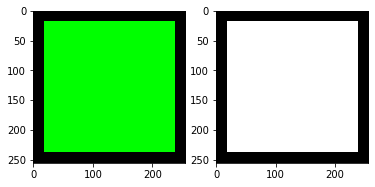

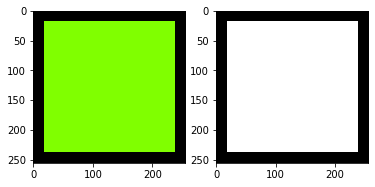

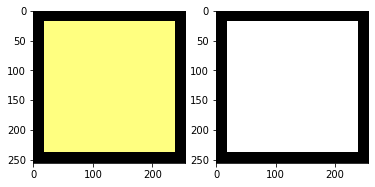

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt

# Create a black image
image = torch.zeros(size=(3, 256, 256), dtype=torch.int)

# Leave the borders and make the rest of the image Green
image[1, 18:256 - 18, 18:256 - 18] = 255

# Create a mask of the same size
mask = torch.zeros(size=(256, 256), dtype=torch.bool)

# Assuming the green region in the original image is the Region of interest, change the mask to white for that area
mask[18:256 - 18, 18:256 - 18] = 1

# Create a view of the mask with the same dimensions as the original image
mask_expanded = mask.expand_as(image)
print(mask_expanded.shape)

mask_np = mask_expanded.numpy().transpose(1, 2, 0) * 255
image_np = image.numpy().transpose(1, 2, 0)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_np)
ax[1].imshow(mask_np)
plt.show()

image[0, mask] += 128
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_np)
ax[1].imshow(mask_np)
plt.show()

image[mask_expanded] += 128
image.clamp_(0, 255)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_np)
ax[1].imshow(mask_np)
plt.show()



In the example above, one can also find a couple of useful tricks:
- `clamp` method and function is a Pytorch's analogue of NumPy's `clip` function
- many operations on tensors have in-place form, that does not return modified data, but change values in the tensor. The in-place version of the operation has trailing underscore according to Pytorch's naming convention - in the example above it is `clamp_`
- tensors have the same indexing as Numpy's arrays - one can use `:`-separated range, negative indexes and so on.

# <font style="color:rgb(50,120,229)">Images and their representations</font>

Now, let's discuss images, their representations and how different Python libraries work with them.

Probably, the most well-known library for image loading and simple processing is [Pillow](https://pillow.readthedocs.io/en/stable/). Another common alternative, that supports lots of image (and not only image) formats is [imageio](https://imageio.readthedocs.io/en/latest/index.html).

However, many people in deep learning area stick with OpenCV for image loading and processing with some usage of another libraries when it is justified by performance/functionality. This is because OpenCV is in general much faster than the other libraries. Here you can find a couple of benchmarks:
- https://www.kaggle.com/zfturbo/benchmark-2019-speed-of-image-reading
- https://github.com/albumentations-team/albumentations#benchmarking-results

To sum up the benchmarks above, there are two most common image formats: PNG and JPEG. If your data is in PNG format - use OpenCV to read it. If it is in JPEG - use libturbojpeg. For image processing, use OpenCV if possible.

However, you can find some pitfalls in these image reading/showing/processing operations. Let's discuss them.

As you will read the code from other some, you may find out that some of them still use Pillow/something else to read data. You should know, that color image representations in OpenCV and other libraries are different - OpenCV uses "BGR" channel order, while others use "RGB" one. Good news is that it's easy to convert one representation to another and vice versa.

To cope with "BGR" <-> "RGB" conversion let's recall that image is actually a tensor with the shape `HxWxC`, where `H` is the height of the image, `W` is its width and `C` is the number of channels, in our case - 3. To convert image from "BGR" representation to "RGB" the only thing we should do is to change channel order!

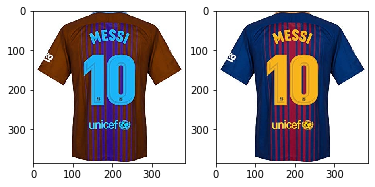

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

bgr_image = cv2.imread('./img/jersey.jpg')
rgb_image = bgr_image[..., ::-1]
fig, ax = plt.subplots(1, 2)
ax[0].imshow(bgr_image)
ax[1].imshow(rgb_image)
plt.show()

Please note that Matplotlib also uses "RGB" channel order, to the right cat image is correct.

# <font style="color:rgb(50,120,229)">Autograd</font>

Pytorch supports automatic differentiation. The module which implements this is called **Autograd**. It calculates the gradients and keeps track in forward and backward passes. For primitive tensors, you need to enable or disable it using the `requires_grad` flag. But, for advanced tensors, it is enabled by default.

In [9]:
a = torch.rand((3, 5), requires_grad=True)
print(a)
result = a * 5
print(result)

# grad can be implicitly created only for scalar outputs
# so let's calculate the sum here so that the output becomes a scalar and we can apply a backward pass
mean_result = result.sum()
# Calculate Gradient
mean_result.backward()
# Print gradient of a
print(a.grad)

tensor([[0.3243, 0.5056, 0.7515, 0.4767, 0.5599],
        [0.4605, 0.9070, 0.3892, 0.6711, 0.3559],
        [0.1854, 0.0775, 0.7116, 0.8165, 0.6411]], requires_grad=True)
tensor([[1.6215, 2.5279, 3.7576, 2.3835, 2.7995],
        [2.3024, 4.5352, 1.9459, 3.3553, 1.7794],
        [0.9271, 0.3876, 3.5581, 4.0823, 3.2053]], grad_fn=<MulBackward0>)
tensor([[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.]])


As we see, Pytorch automagically calculated the gradient value for us. It looks to be the correct value - we multiplied an input by 5, so the gradient of this operation equals to 5.

### <font style="color:rgb(8,133,37)">Disabling Autograd for tensors </font>

We don't need to compute gradients for all the variables that are involved in the pipeline. The Pytorch API provides 2 ways to disable autograd.

1. `detach` - returns a copy of the tensor with autograd disabled. This copy is built on the same memory as the original tensor, so in-place size / stride / storage changes (such as resize_ / resize_as_ / set_ / transpose_) modifications are **not** allowed.
1. `torch.no_grad()` - It is a context manager that allows you to guard a series of operations from autograd without creating new tensors.

In [10]:
a = torch.rand((3, 5), requires_grad=True)
detached_a = a.detach()
detached_result = detached_a * 5
result = a * 10
# we cannot do backward pass that is required for autograd using multideminsional output,
# so let's calculate the sum here
mean_result = result.sum()
mean_result.backward()
a.grad

tensor([[10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.]])

In [11]:
a = torch.rand((3, 5), requires_grad=True)
with torch.no_grad():
    detached_result = a * 5
result = a * 10
# we cannot do backward pass that is required for autograd using multideminsional output,
# so let's calculate the sum here
mean_result = result.sum()
mean_result.backward()
a.grad

tensor([[10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.]])